# <font color="green">Python for Data Science Mini Project - Using ITP/NPV Techniques</font>


ITP/NPV Techniques - Introduction to Python/Numpy, Pandas, Visualization Techniques

### Problem:  A Bank Marketing campaigns of a Portuguese banking institution need to identify the factors that cause the customers to tend to take the subscription, and need to identify the reasons behind non-subscription of the product (a bank term deposit)

### Objectives: 
1. Import and Understand the Data Set

2. Data Exploration - Understand different features/variables of the data set

3. Data Cleaning - Remove duplicate, null or NaN values (if any)

4. Data Wrangling - Combine/Extract complex data variables to smaller sizes, to make tio easier to analyze

5. Visualization - Visualize the resulting datasets into plots, charts and deduce conclusions

6. Conclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CHECK POINT 1
### 1.Import data set

In [2]:
bank = pd.read_csv("bank1.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### 2. Make the data proper to make use of data for analysis
### A. Identify the Features data types before entering into the analysis

In [3]:
bank.info() # Identifying features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### 2. B Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once

In [5]:
new_dtypes = {'default': 'category','loan': 'category','housing': 'category','y': 'category',
              'day': 'int', 'previous':'int'
             }

In [6]:
new_dtypes.items()

dict_items([('default', 'category'), ('loan', 'category'), ('housing', 'category'), ('y', 'category'), ('day', 'int'), ('previous', 'int')])

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#User defined function to change the data types:

def convert_to_new_dtypes(df):
    for col, new_value in new_dtypes.items():
        if col in bank.columns:
            bank[col] = bank[col].astype(new_value)
            
convert_to_new_dtypes(bank)
print(bank.dtypes) 

#The dtypes of 'default', 'loan', 'housing', 'y', 'day' and 'previous' columns are changed

age             int64
job            object
marital        object
education      object
default      category
balance         int64
housing      category
loan         category
contact        object
day             int32
month          object
duration        int64
campaign        int64
pdays           int64
previous        int32
poutcome       object
y            category
dtype: object


### 2.C.	Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.

In [9]:
bank.isnull().sum() #There are no null values in this dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bank.isna().sum() #There are no NaN values in this dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
bank.dropna() #Drop NaN values on the whole dataset (if present, and if applicable)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### 2.D Find duplicates (if necessary)

In [12]:
bank[bank.duplicated()] #There are no duplicates in this dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [13]:
bank.duplicated().sum() #There are no duplicates in this dataset

0

## CHECK POINT 2
### 3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [14]:
bank #Column 'y' indicates if the client has subscribed to term deposit, yes or no

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [15]:
avg_bal = bank.groupby('y').balance.mean()
print(round(avg_bal))

#Groupby done on y column, and average of 'balance' of subscribers and non-subscribers are mentioned beside them

y
no     1403.0
yes    1572.0
Name: balance, dtype: float64


In [16]:
#Visualization of the above. First, convert the result stored in avg_bal variable to a dataframe

avg_bal_df = pd.DataFrame(avg_bal.reset_index())
avg_bal_df = avg_bal_df.round() #just rounded the values of avg_bal
avg_bal_df

,y,balance
0,no,1403.0
1,yes,1572.0


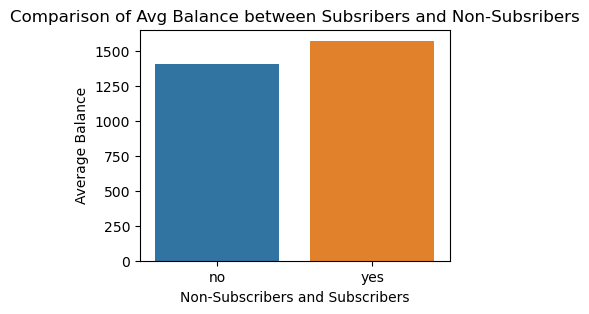

In [17]:
plt.figure(figsize = (4,3), dpi=100)

sns.barplot(avg_bal_df, x='y', y ='balance', width = 0.8)

plt.xlabel('Non-Subscribers and Subscribers')
plt.ylabel('Average Balance')
plt.title('Comparison of Avg Balance between Subsribers and Non-Subsribers')
plt.show()


### 4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

In [18]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [19]:
edu_freq = bank.education.value_counts()
print(edu_freq, '\n')
print(edu_freq.index)

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

Index(['secondary', 'tertiary', 'primary', 'unknown'], dtype='object')


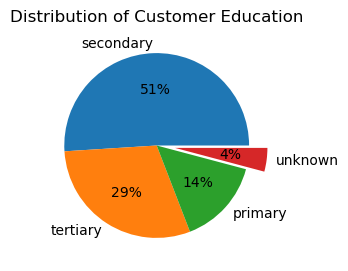

In [20]:
plt.figure(figsize = (4,3), dpi=100)

plt.pie(x=edu_freq, labels=edu_freq.index,autopct='%d%%', explode=[0,0,0,0.2])

plt.title('Distribution of Customer Education')
plt.show()


### 5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [21]:
bank = pd.read_csv("bank1.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [22]:
bank.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [23]:
def seasons(df):
    df['Seasons'] = "Unknown"  # Initialize the 'Seasons' column to 'Unknown' to ensure all values are assigned
    for index, row in df.iterrows(): # to iterate through each row of the DataFrame
        month = row['month']
        if month in ['dec', 'jan', 'feb']:
            df.at[index, 'Seasons'] = 'Winter' #to directly set the value of the 'Seasons' for the applicable row
        elif month in ['mar', 'apr', 'may']:
            df.at[index, 'Seasons'] = 'Spring'
        elif month in ['jun', 'jul', 'aug']:
            df.at[index, 'Seasons'] = 'Summer'
        elif month in ['sep', 'oct', 'nov']:
            df.at[index, 'Seasons'] = 'Autumn'
            
seasons(bank)

In [24]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Winter


### 6.Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

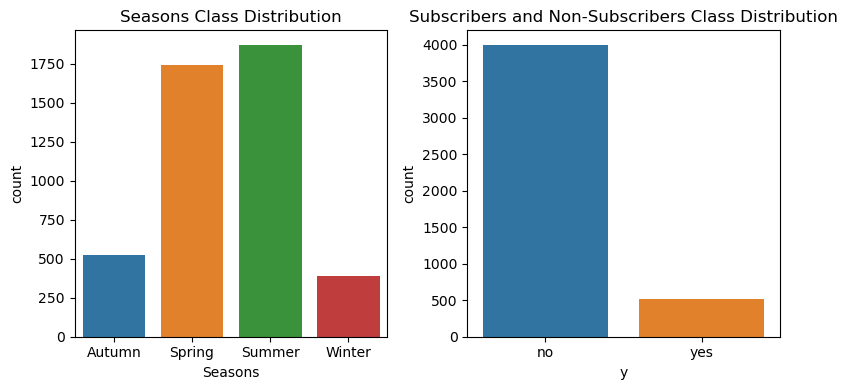

In [25]:
#Column 'y' indicates if the client has subscribed to term deposit, yes or no
#Column 'Seasons' variable indicates to what season the last client contacted month falls under

plt.figure(figsize = (8,4), dpi=100)

plt.subplot(1,2,1) #indicates plot to be at 1st row, having 2 columns and at position 1
sns.countplot(data=bank, x='Seasons') 
plt.title('Seasons Class Distribution')


plt.subplot(1,2,2) #indicates plot to be at 1st row, having 2 columns and at position 2
sns.countplot(data=bank, x='y') 
plt.title('Subscribers and Non-Subscribers Class Distribution')

plt.tight_layout()

In [26]:
bank.y.value_counts(normalize=True) #percentage of subscribers and non-subscribers

no     0.88476
yes    0.11524
Name: y, dtype: float64

### 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

In [27]:
#Pdays - number of days that passed after the client was last contacted from a previous campaign  
#(numeric, -1 means client was not previously contacted)

#y - is the subscribers or non subscribers

#let us use another feature to compare,

#poutcome - outcome of the previous marketing campaign ("unknown","other","failure","success")

bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Winter


In [28]:
bank.groupby('poutcome').pdays.count()
#unknown has most values which are -1 implying customers have not been contacted at all

poutcome
failure     490
other       197
success     129
unknown    3705
Name: pdays, dtype: int64

In [29]:
bank.groupby('y').pdays.count() #Maximum non-subscribers. Let us show this in a plot

y
no     4000
yes     521
Name: pdays, dtype: int64

In [30]:
# As there are too many p-days values.let us categorize them into smaller chunks, 
#similar to what we did with 'months' to 'Seasons'

In [31]:
bins = [-float('inf'),0,90, 180, 270, float('inf')]  # Use float('inf') for values greater than 270
#-float('inf') for values before 0

labels = ['Not Contacted', '0-3 months', '4-6 months', '7-9 months', '10 m to 1 year']

# Cut the values in the "pdays" column into bins and assign labels
bank['pmonths'] = pd.cut(bank['pdays'], bins=bins, labels=labels)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Autumn,Not Contacted
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Spring,10 m to 1 year
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring,10 m to 1 year
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer,Not Contacted
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Spring,Not Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Summer,Not Contacted
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Spring,Not Contacted
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Summer,Not Contacted
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Winter,7-9 months


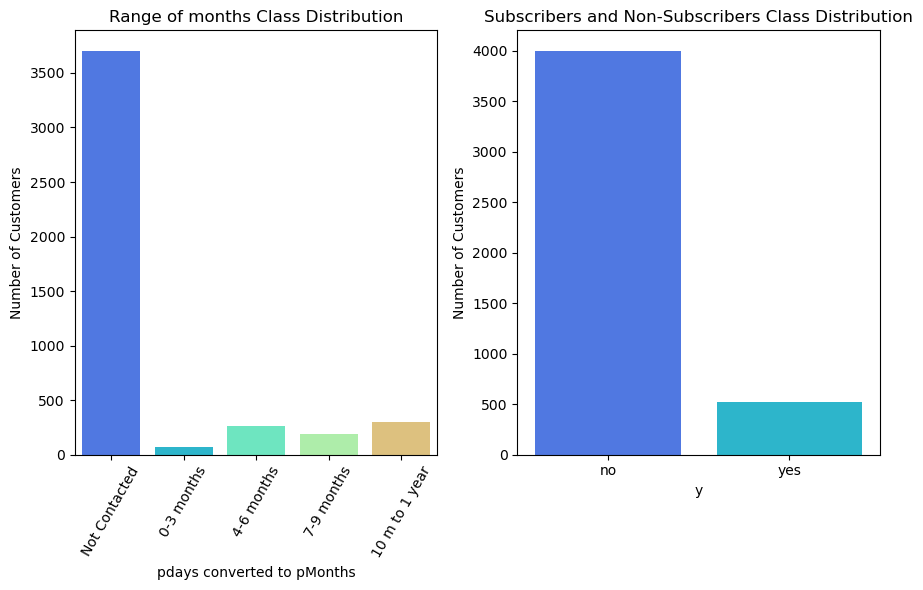

In [32]:
plt.figure(figsize = (9,6), dpi=100)
sns.set_palette(palette='rainbow')

plt.subplot(1,2,1) #indicates plot to be at 1st row, having 2 columns and at position 1
sns.countplot(data=bank, x='pmonths') 
plt.title('Range of months Class Distribution')
plt.xlabel('pdays converted to pMonths')
plt.ylabel('Number of Customers')
plt.xticks(rotation=60)

plt.subplot(1,2,2) #indicates plot to be at 1st row, having 2 columns and at position 2
sns.countplot(data=bank, x='y') 
plt.title('Subscribers and Non-Subscribers Class Distribution')
plt.ylabel('Number of Customers')

plt.tight_layout()

### 8. Replace the -1 as nan values for the P-days store

In [33]:
bank['pdays'] = np.where(bank['pdays'] == -1, np.nan, bank['pdays'])
bank

#np.where function does not alter the entire df, but only the single array/column that needs changes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Autumn,Not Contacted
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Spring,10 m to 1 year
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring,10 m to 1 year
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer,Not Contacted
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Spring,Not Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,Summer,Not Contacted
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,Spring,Not Contacted
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,Summer,Not Contacted
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,Winter,7-9 months


### 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

In [34]:
#Not included the NaN values that were initially -1

bins = [0,90, 180, 270, float('inf')]  # Use float('inf') for values greater than 270
labels = ['0-3 months', '4-6 months', '7-9 months', '10 m to 1 year']

# Cut the values in the "pdays" column into bins and assign labels
bank['pmonths'] = pd.cut(bank['pdays'], bins=bins, labels=labels)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Autumn,NaN
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Spring,10 m to 1 year
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring,10 m to 1 year
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer,NaN
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Spring,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,Summer,NaN
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,Spring,NaN
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,Summer,NaN
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,Winter,7-9 months


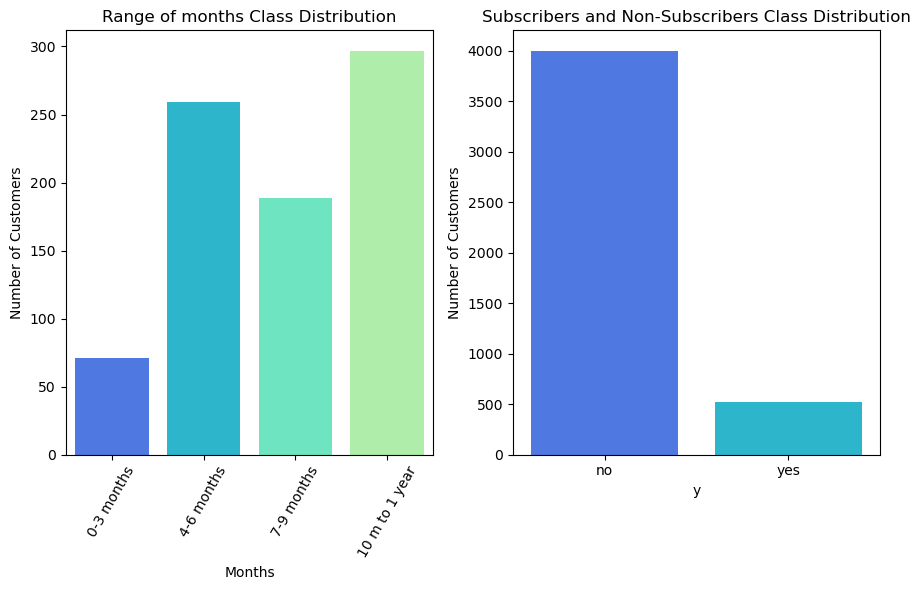

In [35]:
plt.figure(figsize = (9,6), dpi=100)
sns.set_palette(palette='rainbow')

plt.subplot(1,2,1) #indicates plot to be at 1st row, having 2 columns and at position 1
sns.countplot(data=bank, x='pmonths') 
plt.title('Range of months Class Distribution')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.xticks(rotation=60)

plt.subplot(1,2,2) #indicates plot to be at 1st row, having 2 columns and at position 2
sns.countplot(data=bank, x='y') 
plt.title('Subscribers and Non-Subscribers Class Distribution')
plt.ylabel('Number of Customers')

plt.tight_layout()

### 10. Does the customer take the term subscription who has less than 0 balance?
### Hint: Use any kind of plot which would you the related information to this question.


In [36]:
bank #Assuming the question is if the customer will take the term subscription who has 0 balance

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Autumn,NaN
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Spring,10 m to 1 year
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring,10 m to 1 year
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer,NaN
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Spring,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,Summer,NaN
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,Spring,NaN
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,Summer,NaN
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,Winter,7-9 months


In [37]:
bank.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [38]:
bank[(bank.balance == 0) & (bank.poutcome == 'success')]
#There are 11 records where customer bank balance = 0 "with" subcription

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
70,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182.0,3,success,yes,Summer,7-9 months
233,45,blue-collar,single,secondary,no,0,yes,no,cellular,26,jul,768,2,91.0,5,success,no,Summer,4-6 months
941,34,management,married,tertiary,no,0,yes,no,cellular,7,aug,262,1,99.0,2,success,yes,Summer,4-6 months
1437,77,retired,married,tertiary,no,0,no,no,cellular,16,oct,847,1,60.0,1,success,yes,Autumn,0-3 months
1760,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96.0,5,success,yes,Autumn,4-6 months
2266,55,admin.,married,secondary,no,0,no,no,cellular,23,sep,180,2,238.0,3,success,no,Autumn,7-9 months
3027,40,management,married,tertiary,no,0,no,no,cellular,10,nov,147,1,96.0,8,success,yes,Autumn,4-6 months
3385,38,unknown,single,tertiary,no,0,no,no,cellular,11,sep,260,3,95.0,3,success,yes,Autumn,4-6 months
3519,54,technician,married,secondary,no,0,no,no,telephone,14,aug,159,2,106.0,6,success,no,Summer,4-6 months
4186,52,technician,married,tertiary,no,0,no,no,cellular,9,aug,145,3,94.0,4,success,no,Summer,4-6 months


In [39]:
bank_bal_df = bank[bank['balance'] == 0].groupby('poutcome') #groupby the poutcome column where balance = 0
revised_df = bank_bal_df.balance.count()
print(revised_df) #extract only the balance column and give the total count of poutcome values with balance = 0

poutcome
failure     30
other       11
success     11
unknown    305
Name: balance, dtype: int64


In [40]:
bank_bal_df = bank[(bank['balance'] == 0) & (bank.poutcome != 'unknown')].groupby('poutcome') 
new_df = bank_bal_df.balance.count() 
print(new_df)

# Dropped/not considered 'unknown' which implied to pdays -1 (not contacted client) as the # is too high 
# and the plot will not interpret correctly.'unknown' Data is invaluable as client was never contacted to check success rate

poutcome
failure    30
other      11
success    11
Name: balance, dtype: int64


Text(0.5, 1.0, 'Plot to deduce if clients with 0 Balance opt for Subscription')

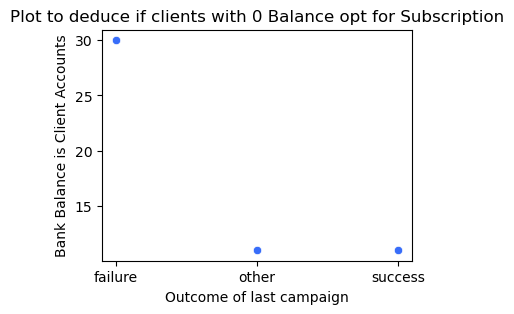

In [41]:
plt.figure(figsize = (4,3), dpi=100)

sns.scatterplot(data=new_df)

plt.xlabel('Outcome of last campaign')
plt.ylabel('Bank Balance is Client Accounts')
plt.title('Plot to deduce if clients with 0 Balance opt for Subscription')

### 11. Use Pivot table to find the maximum balance for each type of job.

In [42]:
bank.pivot_table(index='job',values=['balance'], aggfunc=max)

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


### 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

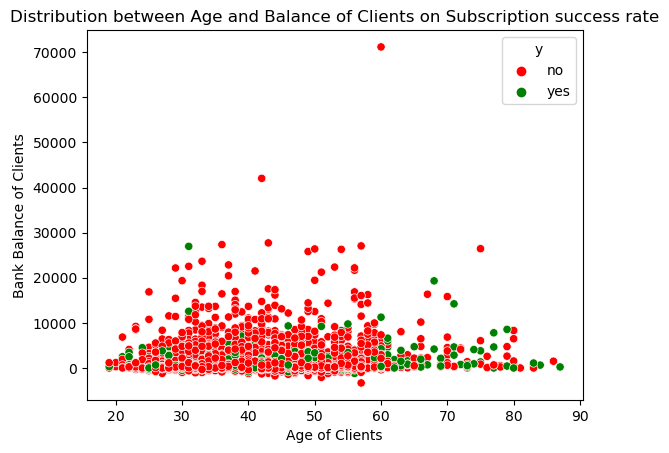

In [43]:
sns.scatterplot(data=bank, x='age', y='balance', hue='y', palette={'yes': 'green', 'no': 'red'})

#palette takes a dict with data of y columns as 'keys' and the colors that denote them as 'values'


plt.xlabel('Age of Clients')
plt.ylabel('Bank Balance of Clients')
plt.title('Distribution between Age and Balance of Clients on Subscription success rate')
plt.show()

### 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

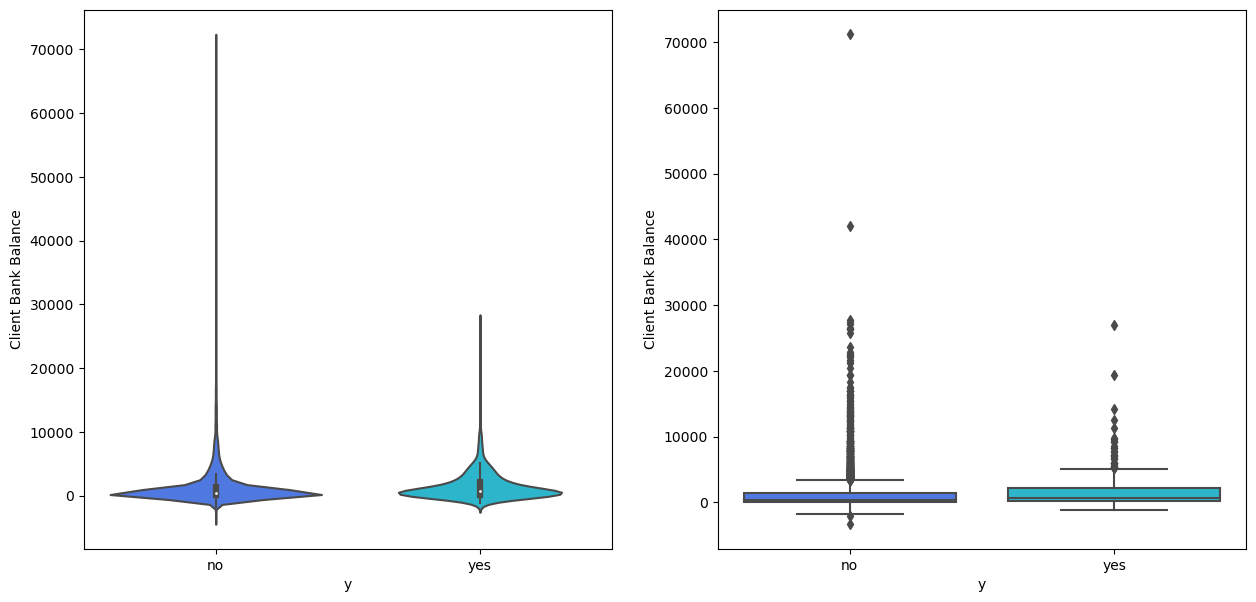

In [44]:
plt.figure(figsize = (15,7), dpi=100)

plt.subplot(1,2,1)
sns.violinplot(data=bank, x='y', y='balance')
plt.ylabel('Client Bank Balance')

plt.subplot(1,2,2)
sns.boxplot(data=bank, x='y', y='balance')
plt.ylabel('Client Bank Balance')

plt.tight_layout

In [45]:
bank[bank.balance < 30000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Autumn,NaN
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Spring,10 m to 1 year
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring,10 m to 1 year
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer,NaN
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Spring,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no,Summer,NaN
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no,Spring,NaN
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no,Summer,NaN
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no,Winter,7-9 months


In [46]:
bank[bank.balance > 30000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Seasons,pmonths
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,NaN,0,unknown,no,Summer,NaN
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,NaN,0,unknown,no,Autumn,NaN


### 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
### Note: Try to explore more parameters that are there in the pie-plot method.


In [47]:
pie_df = bank['default'].value_counts()
pie_df    #There are 76 defaulters and 4445 non-defaulters/clean clients

no     4445
yes      76
Name: default, dtype: int64

([<matplotlib.patches.Wedge at 0x1ae1075d510>,
 [Text(-1.0200882278688135, -0.4116066172493633, 'Non-Defaulters'),
  Text(1.4837646530411148, 0.5987006383709482, 'Defaulters')],
 [Text(-0.5564117606557164, -0.22451270031783452, '98.32%'),
  Text(1.0200881989657662, 0.4116066888800269, '1.68%')])

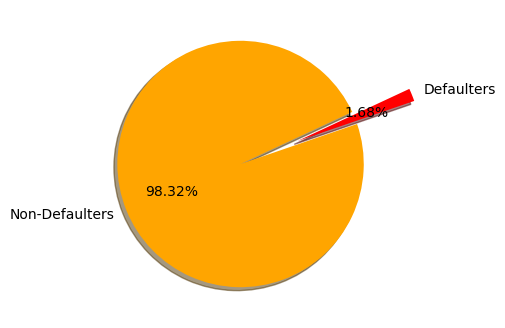

In [48]:
plt.figure(figsize=(4,4),dpi=100)

plt.pie(x=pie_df, labels=['Non-Defaulters', 'Defaulters'], explode = [0,0.5],autopct= '%.2f%%',startangle=25,
 shadow=True, colors=['orange','red'])


# The number of defaulters are only 1.68% which are highlighted using the 'explode' parameter.

### 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

In [49]:
bank = pd.read_csv("bank1.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Text(0, 0.5, 'pdays (Client last contacted pdays ago)')

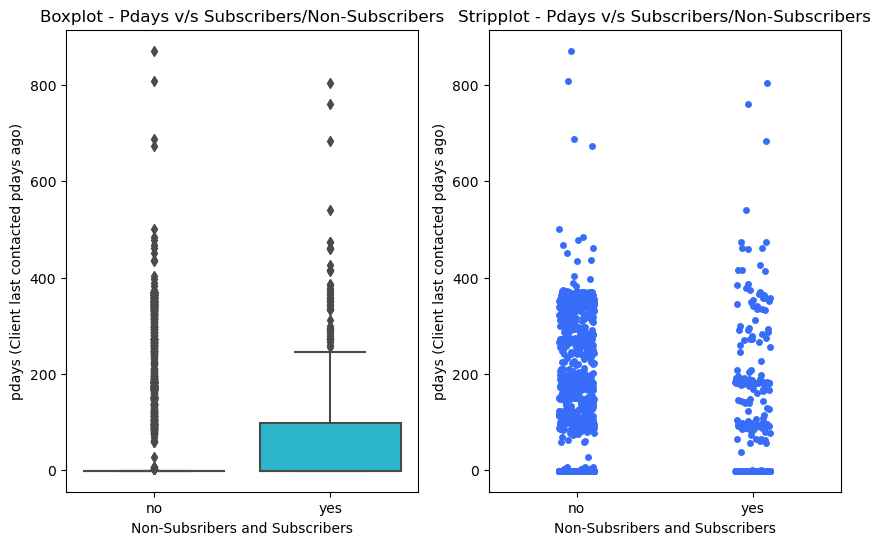

In [50]:
plt.figure(figsize=(10,6),dpi=100)

plt.subplot(1,2,1)
sns.boxplot(data=bank, x='y', y='pdays')
plt.title('Boxplot - Pdays v/s Subscribers/Non-Subscribers')
plt.xlabel('Non-Subsribers and Subscribers')
plt.ylabel('pdays (Client last contacted pdays ago)')


plt.subplot(1,2,2)
sns.stripplot(data=bank, x='y', y='pdays', jitter=True)
plt.title('Stripplot - Pdays v/s Subscribers/Non-Subscribers')
plt.xlabel('Non-Subsribers and Subscribers')
plt.ylabel('pdays (Client last contacted pdays ago)')

# CONCLUSIONS

### The conclusions are listed down as per each aspect of the data, in order to better understand them, and execute solutions

*** THANK YOU***